# Enriched Approach

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Cleaning the data

In [3]:
data_set = pd.read_csv("Full_data.csv")

original_size = len(data_set)

# Dropping unnecessary columns
drop_columns = ["Unnamed: 0", "lyrics", "data", "analysis_url", "id", "track_href", "type", "uri"]
data_set = data_set.drop(drop_columns, axis=1)

# Dropping invalid songs
null_elem = data_set.isnull().any(axis=1)
data_set = data_set[~null_elem]
data_set = data_set.reset_index(drop=True)
reduced_size = len(data_set)

# Encoding author, style and title
to_encode = ["author", "style", "title"]
new_col_names = ["code_author", "code_style", "code_title"]
new_col_index = [1, 3, 5]
encoders = []
for i in range(len(to_encode)):
    values = data_set[to_encode[i]]
    encoder = LabelEncoder()
    encoders.append(encoder)
    new_col = encoder.fit_transform(values) 
    data_set.insert(new_col_index[i], new_col_names[i], new_col)
    
# Dropping author, style and title
drop_columns = ["author", "style", "title"]
data_set = data_set.drop(drop_columns, axis=1)

reduction = (original_size-reduced_size)/original_size
print("Data set reduction = ", reduction)

drop_columns = ["code_title"]
data_set = data_set.drop(drop_columns, axis=1)

data_set

Data set reduction =  0.286112349531877


,code_author,code_style,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2348,9,0.277000,0.517,293593.0,0.590,0.000000,4.0,0.1130,-6.670,1.0,0.0393,129.800,4.0,0.129
1,986,9,0.163000,0.599,263400.0,0.448,0.000000,8.0,0.1060,-6.312,1.0,0.0232,95.050,3.0,0.168
2,1941,6,0.388000,0.680,264013.0,0.640,0.000000,5.0,0.4080,-7.803,1.0,0.1340,81.974,4.0,0.775
3,507,6,0.678000,0.779,429273.0,0.605,0.005550,4.0,0.1850,-9.522,0.0,0.0386,110.008,4.0,0.571
4,507,6,0.500000,0.404,194667.0,0.833,0.000000,2.0,0.9670,-6.245,1.0,0.1360,171.969,4.0,0.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32020,1186,15,0.056400,0.302,169373.0,0.920,0.000000,2.0,0.4540,-3.566,1.0,0.0925,179.956,4.0,0.407
32021,541,15,0.000330,0.355,139400.0,0.955,0.000000,1.0,0.1320,-3.045,0.0,0.0800,179.043,4.0,0.654
32022,2820,15,0.021700,0.596,282133.0,0.903,0.000000,4.0,0.6280,-2.908,0.0,0.1450,133.173,4.0,0.309
32023,3123,15,0.000202,0.372,218004.0,0.961,0.000002,8.0,0.0945,-2.407,1.0,0.2210,165.054,4.0,0.337


## Applying PCA and Logistic Regression

In [4]:
# Split Data into Training and Test Sets
from sklearn.model_selection import train_test_split

data = data_set.loc[:, data_set.columns != 'code_style']
lbl = data_set.loc[:,'code_style']

# test_size: what proportion of original data is used for test set
train_data, test_data, train_lbl, test_lbl = train_test_split( data, lbl, test_size=1/7, random_state=0)

In [5]:
# Standardize the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_data)

# Apply transform to both the training set and the test set.
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [6]:
# Import and Apply PCA
from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(5)

pca.fit(train_data)
train_data = pca.transform(train_data)
test_data = pca.transform(test_data)
train_data.shape

(27450, 5)

In [7]:
pca.explained_variance_ratio_

array([0.19344117, 0.12137762, 0.08451496, 0.08064967, 0.07383673])

In [9]:
# Apply Logistic Regression to the Transformed Data
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_data, train_lbl)
logisticRegr.predict(test_data)

logisticRegr.score(test_data, test_lbl)

/home/tristan/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.12480874316939891

In [23]:
data_set

,code_author,code_style,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2348,9,0.277000,0.517,293593.0,0.590,0.000000,4.0,0.1130,-6.670,1.0,0.0393,129.800,4.0,0.129
1,986,9,0.163000,0.599,263400.0,0.448,0.000000,8.0,0.1060,-6.312,1.0,0.0232,95.050,3.0,0.168
2,1941,6,0.388000,0.680,264013.0,0.640,0.000000,5.0,0.4080,-7.803,1.0,0.1340,81.974,4.0,0.775
3,507,6,0.678000,0.779,429273.0,0.605,0.005550,4.0,0.1850,-9.522,0.0,0.0386,110.008,4.0,0.571
4,507,6,0.500000,0.404,194667.0,0.833,0.000000,2.0,0.9670,-6.245,1.0,0.1360,171.969,4.0,0.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32020,1186,15,0.056400,0.302,169373.0,0.920,0.000000,2.0,0.4540,-3.566,1.0,0.0925,179.956,4.0,0.407
32021,541,15,0.000330,0.355,139400.0,0.955,0.000000,1.0,0.1320,-3.045,0.0,0.0800,179.043,4.0,0.654
32022,2820,15,0.021700,0.596,282133.0,0.903,0.000000,4.0,0.6280,-2.908,0.0,0.1450,133.173,4.0,0.309
32023,3123,15,0.000202,0.372,218004.0,0.961,0.000002,8.0,0.0945,-2.407,1.0,0.2210,165.054,4.0,0.337


### Covariance

(-0.5, 14.5, 14.5, -0.5)

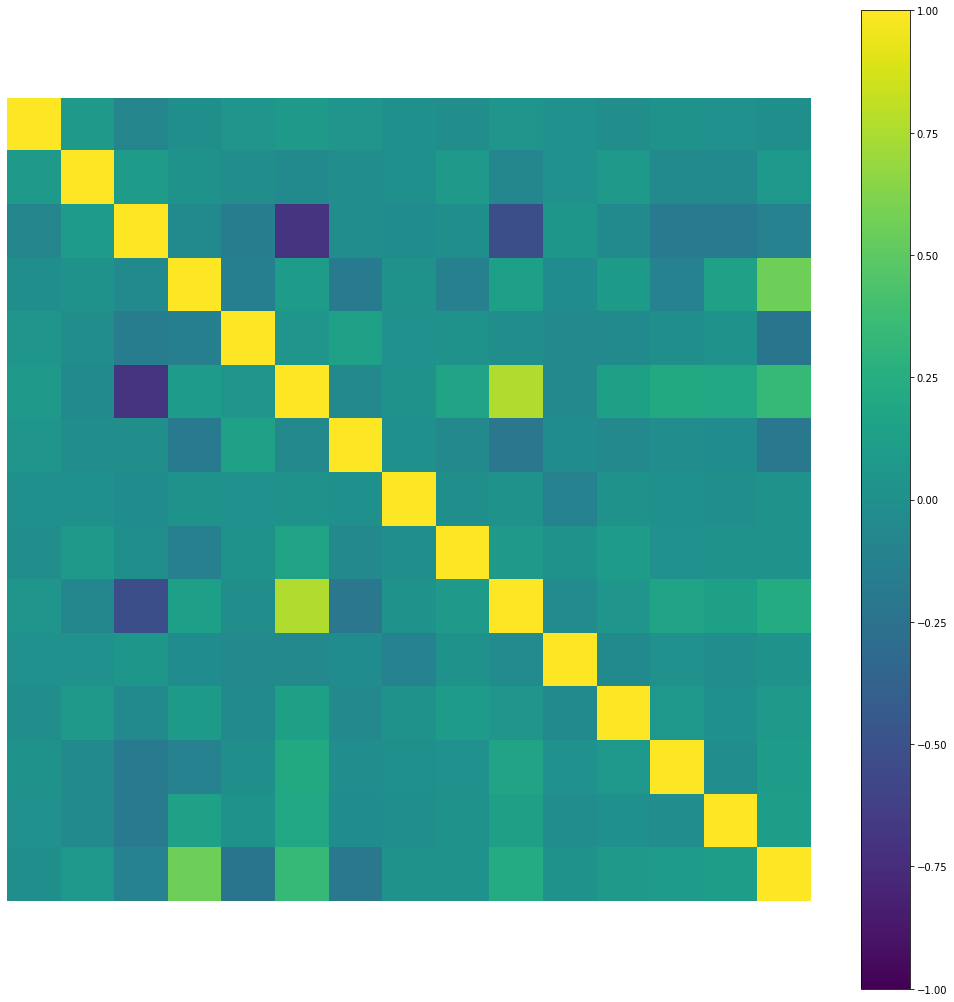

In [22]:
cor = data_set.corr()
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.axis('off')